# FUNCTIONAL API

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# creating a input node
inputs = keras.Input(shape=(784,))

In [ ]:
# Just for demonstration purposes.
img_inputs = keras.Input(shape=(32, 32, 3))

In [ ]:
inputs.shape


TensorShape([None, 784])

In [ ]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [ ]:
x.shape

TensorShape([None, 64])

In [ ]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [ ]:
outputs.shape

TensorShape([None, 10])

In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

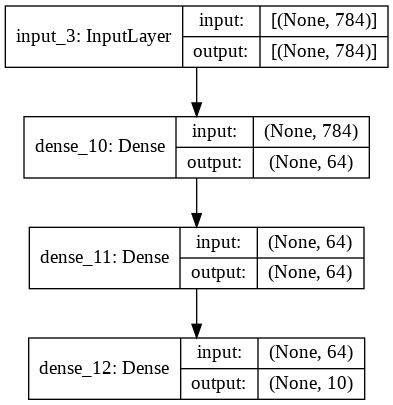

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/2
750/750 [==============================] - 4s 3ms/step - loss: 0.5791 - accuracy: 0.8345 - val_loss: 0.1824 - val_accuracy: 0.9460
Epoch 2/2
750/750 [==============================] - 2s 2ms/step - loss: 0.1772 - accuracy: 0.9487 - val_loss: 0.1457 - val_accuracy: 0.9567
313/313 - 0s - loss: 0.1389 - accuracy: 0.9567
Test loss: 0.13894301652908325
Test accuracy: 0.9567000269889832


In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

In [ ]:
tf.keras.utils.plot_model(
    autoencoder,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="reviewer comments"
)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="customer feedbacks")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_tags,), name="tabular data"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="prediction")(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="daystoclose")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

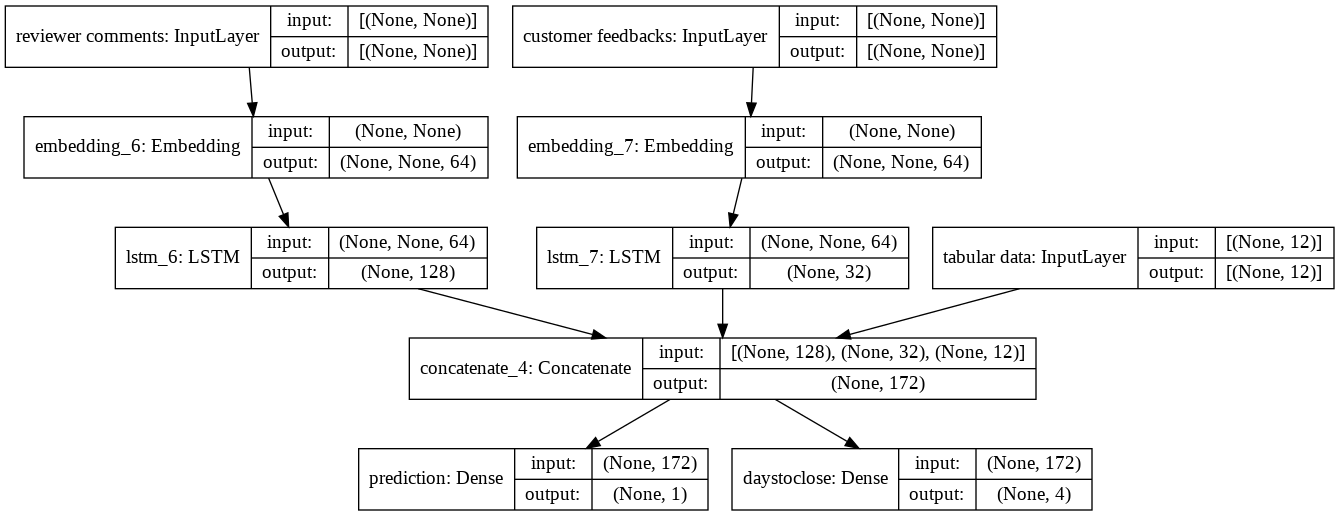

In [ ]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

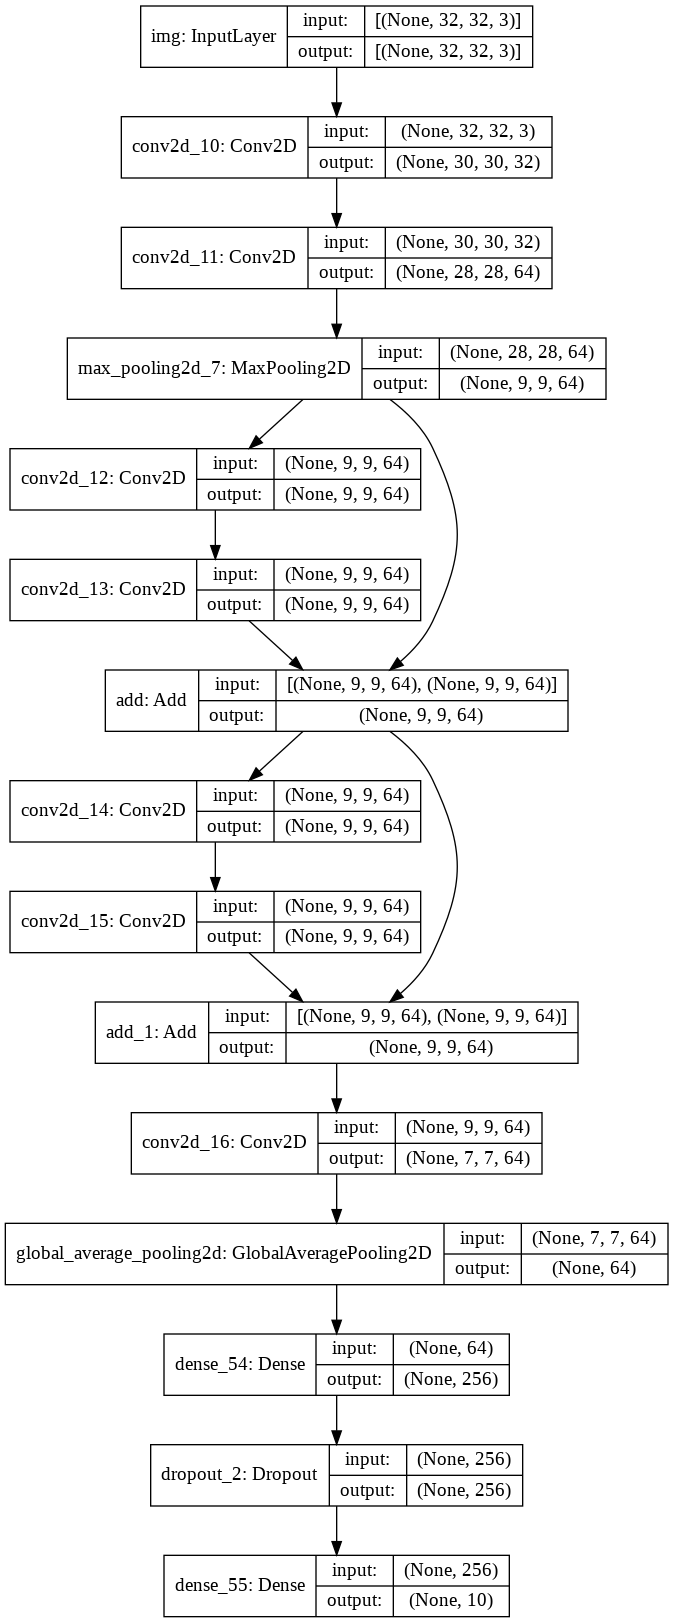

In [ ]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=1, validation_split=0.2)

13/13 [==============================] - 6s 35ms/step - loss: 2.3314 - acc: 0.1255 - val_loss: 2.3000 - val_acc: 0.0700


## Sequential Model vs Functional API Model

Model: "Sequential Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


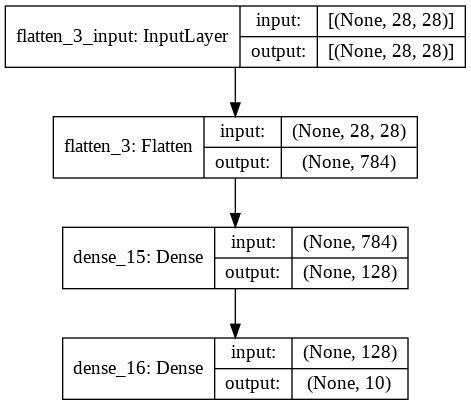

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
], name="Sequential Model")

print(model.summary())
keras.utils.plot_model(model, "seq_model.png", show_shapes=True)

Model: "functional_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_63 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


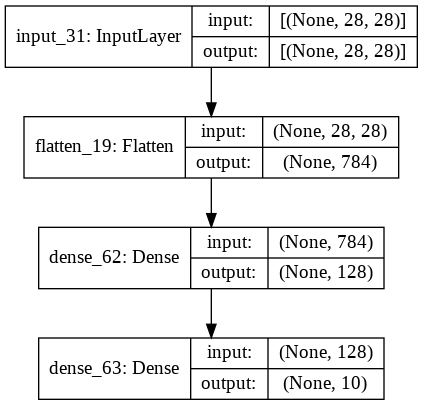

In [ ]:
inputs = keras.Input(shape=(28, 28))
flatten = keras.layers.Flatten()
dense1 = keras.layers.Dense(128, activation='relu')
dense2 = keras.layers.Dense(10)

x = flatten(inputs)
x = dense1(x)
outputs = dense2(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="functional_model")
	
model.summary()
keras.utils.plot_model(model, "functional_model.png", show_shapes=True)


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 2s 2ms/step - loss: 0.5182 - accuracy: 0.8602 - val_loss: 0.1744 - val_accuracy: 0.9512
Epoch 2/2
750/750 [==============================] - 2s 2ms/step - loss: 0.1619 - accuracy: 0.9528 - val_loss: 0.1300 - val_accuracy: 0.9628
313/313 - 0s - loss: 0.1222 - accuracy: 0.9630
Test loss: 0.12224381417036057
Test accuracy: 0.9629999995231628


In [ ]:
feature_model = keras.Model(inputs=model.inputs, outputs=model.get_layer('dense_62').output)

In [ ]:
feature_model.predict(np.array([x_test[0]])).shape

(1, 128)

In [ ]:
np.argmax(model.predict(np.array([x_test[0]])), axis=1)

array([7])

# VQA

In [ ]:
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model, Sequential

In [ ]:
# Define CNN for Image Input
vision_model = Sequential()
vision_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
vision_model.add(Conv2D(64, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(128, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Flatten())

image_input = Input(shape=(224, 224, 3))
encoded_image = vision_model(image_input)

# Define RNN for language input
question_input = Input(shape=(100,), dtype='int32')
embedded_question = Embedding(input_dim=10000, output_dim=256, input_length=100)(question_input)
encoded_question = LSTM(256)(embedded_question)

# Combine CNN and RNN to create the final model
merged = tf.keras.layers.concatenate([encoded_question, encoded_image])
output = Dense(1000, activation='softmax')(merged)
vqa_model = Model(inputs=[image_input, question_input], outputs=output)

# VQA

# Processing Image

## Imports

In [ ]:
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
! pip install easy-vqa

In [ ]:
from easy_vqa import get_train_questions, get_test_questions, get_train_image_paths, get_test_image_paths
train_questions, train_answers, train_image_ids = get_train_questions()
test_questions, test_answers, test_image_ids = get_test_questions()

In [ ]:
len(train_questions), len(train_answers), len(train_image_ids)

(38575, 38575, 38575)

## Checking a data point

In [ ]:
print(train_questions[0])
print(train_answers[0])  
print(train_image_ids[0])

what is the blue shape?
rectangle
0


In [ ]:
# loading the image paths
train_image_paths = get_train_image_paths()
test_image_paths = get_test_image_paths()

print(train_image_paths[0]) # ends in easy_vqa/data/train/images/0.png

/usr/local/lib/python3.6/dist-packages/easy_vqa/data/train/images/0.png


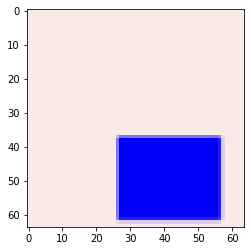

In [ ]:
img = mpimg.imread(train_image_paths[0])
plt.imshow(img)

## Let us create a function that can plot a random batch

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
np.random.seed(4)

def plot_batch(from_paths, size=(16, 8), bs=16, ixs=[]):
    assert int(np.sqrt(bs)) ** 2 == bs, "Batch size must be a perfect square"
    assert bs <= len(from_paths), "Batch size is greater than total images"
    fig, ax = plt.subplots(int(np.sqrt(bs)), int(np.sqrt(bs)), figsize=size)
    if not ixs: ixs = list(np.random.randint(0, len(from_paths) - 1, bs))
    for i in range(int(np.sqrt(bs))):
        for j in range(int(np.sqrt(bs))):
            ip = from_paths[ixs.pop(0)]
            img = mpimg.imread(ip)
            ax[i][j].imshow(img)


Populating the interactive namespace from numpy and matplotlib


[1146, 174, 2487, 709, 1921, 2408, 3671, 456, 2866, 393, 1082, 3836, 3943, 2157, 3678, 2871]


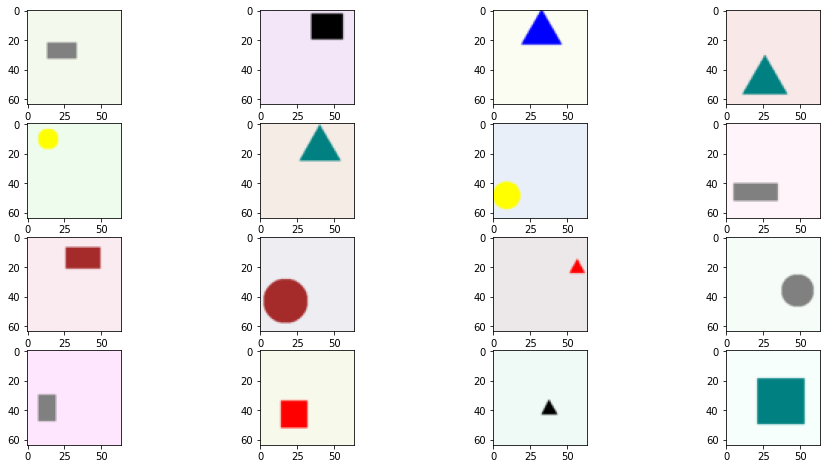

In [ ]:
bs=16
ixs = list(np.random.randint(0, len(train_image_paths) - 1, bs))
print(ixs)
plot_batch(train_image_paths, bs=bs, ixs=ixs.copy())

## Some grid code

lets write some grid code,

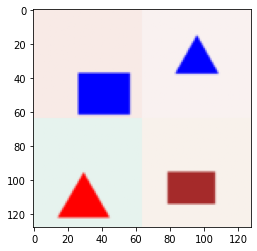

In [ ]:
i1 = mpimg.imread("/usr/local/lib/python3.6/dist-packages/easy_vqa/data/train/images/0.png")
i2 = mpimg.imread("/usr/local/lib/python3.6/dist-packages/easy_vqa/data/train/images/1.png")
i3 = mpimg.imread("/usr/local/lib/python3.6/dist-packages/easy_vqa/data/train/images/2.png")
i4 = mpimg.imread("/usr/local/lib/python3.6/dist-packages/easy_vqa/data/train/images/3.png")

input = np.array([i1, i2, i3, i4])
no_images, height, width, channels = input.shape # this is nrows*ncols, height, width, channels

ncols = 2 # sqrt(bs)
nrows = no_images//ncols

# we want nrows*height, ncols*width, channels
# so,
result = (input.reshape(nrows, ncols, height, width, channels) # changes to nrows, ncols, height, width, channels
          .swapaxes(1, 2) # (nrows(axis=0), ncols(axis=1), height(axis=2), width(axis=3), channels) becomes (nrows, height, ncols, width, channels)
          .reshape(height*nrows, width*ncols, channels)) # changes to the desired output

plt.imshow(result)

In [ ]:
def grid_plot(from_paths, size=(16,8), bs=16, ixs=[]):
    if not ixs: ixs = list(np.random.randint(0, len(from_paths) - 1, bs))
    batch_paths = [from_paths[i] for i in ixs]
    input = np.array([mpimg.imread(p) for p in batch_paths])
    no_images, height, width, channels = input.shape # this is nrows*ncols, height, width, channels

    ncols = int(np.sqrt(bs))
    nrows = no_images//ncols
    assert ncols*nrows == bs, "Batch size must be a perfect square"

    # we want nrows*height, ncols*width, channels
    # so,
    result = (input.reshape(nrows, ncols, height, width, channels) # changes to nrows, ncols, height, width, channels
            .swapaxes(1, 2) # (nrows(axis=0), ncols(axis=1), height(axis=2), width(axis=3), channels) becomes (nrows, height, ncols, width, channels)
            .reshape(height*nrows, width*ncols, channels)) # changes to the desired output
    plt.rcParams["figure.figsize"] = size
    plt.imshow(result)

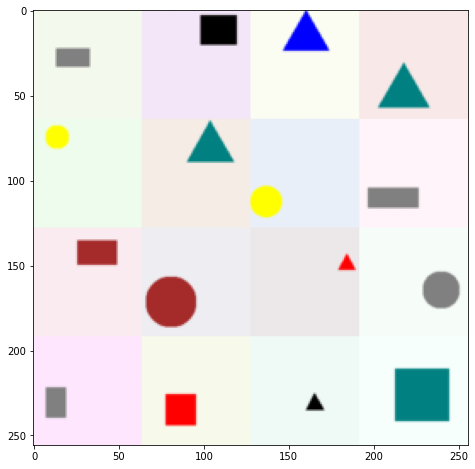

In [ ]:
grid_plot(train_image_paths, bs=bs, ixs=ixs.copy())

In [ ]:
## processing images
from easy_vqa import get_train_image_paths, get_test_image_paths
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_proccess_image(image_path):
  im = img_to_array(load_img(image_path))
  return im / 255 - 0.5

def read_images(paths):
  ims = {}
  for image_id, image_path in paths.items():
    ims[image_id] = load_and_proccess_image(image_path)
  return ims

In [ ]:
train_images = read_images(get_train_image_paths())
test_images = read_images(get_test_image_paths())

train_X_imgs = np.array([train_images[id] for id in train_image_ids])
test_X_imgs = np.array([test_images[id] for id in test_image_ids])

# Processing Text

In [ ]:
from easy_vqa import get_train_questions, get_test_questions
from tensorflow.keras.preprocessing.text import Tokenizer

train_questions, _, _ = get_train_questions()
test_questions, _, _ = get_test_questions()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_questions)

train_X_text = tokenizer.texts_to_matrix(train_questions)
test_X_text = tokenizer.texts_to_matrix(test_questions)

train_X_text[0]

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [ ]:
# answers

from easy_vqa import get_answers

all_answers = get_answers()

print(all_answers)

['circle', 'green', 'red', 'gray', 'yes', 'teal', 'black', 'rectangle', 'yellow', 'triangle', 'brown', 'blue', 'no']


In [ ]:
from tensorflow.keras.utils import to_categorical
train_answer_indices = [all_answers.index(a) for a in train_answers]
test_answer_indices = [all_answers.index(a) for a in test_answers]

In [ ]:
train_Y = to_categorical(train_answer_indices)
test_Y = to_categorical(test_answer_indices)

In [ ]:
# final input to the model

print(np.array(train_X_imgs).shape, train_X_text.shape, train_Y.shape)
print(np.array(test_X_imgs).shape, test_X_text.shape, test_Y.shape)

(38575, 64, 64, 3) (38575, 27) (38575, 13)
(9673, 64, 64, 3) (9673, 27) (9673, 13)


# Building Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Multiply, Concatenate
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_image_model(input_shape):
    # building the CNN here
    image_input = Input(shape=input_shape, name="input")
    
    # Convolution Blocks (Conv2D --> MaxPool)
    x = Conv2D(8, 3, padding='same')(image_input)
    x = MaxPooling2D()(x)
    x = Conv2D(16, 3, padding='same')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(32, 3, padding='same')(x)
    x = MaxPooling2D()(x)
    
    # Flatten and Activate
    x = Flatten()(x)
    x = Dense(32, activation='tanh')(x)

    cnn = Model(image_input, x)
    return cnn

In [ ]:
def build_text_model(vocab_size):
    question_input = Input(shape=(vocab_size,))
    x = Dense(32, activation='tanh')(question_input)
    x = Dense(32, activation='tanh')(x)
    question_model = Model(question_input, x)
    return question_model

In [ ]:
def build_vqa_model(image_shape, vocab_size, num_answers):
    text = build_text_model(vocab_size)
    image = build_image_model(image_shape)

    out = Concatenate()([text.output, image.output])
    out = Dense(32, activation='tanh')(out)
    out = Dense(num_answers, activation='softmax')(out)

    model = Model(inputs=[image.input, text.input], outputs=out)
    model.compile(Adam(lr=5e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
IMAGE_SHAPE = (height, width, channels)
VOCAB_SIZE = len(tokenizer.word_index) + 1
NUM_ANSWERS = len(all_answers)
print(IMAGE_SHAPE, VOCAB_SIZE, NUM_ANSWERS)

(64, 64, 3) 27 13


In [ ]:
model = build_vqa_model(IMAGE_SHAPE, VOCAB_SIZE, NUM_ANSWERS)

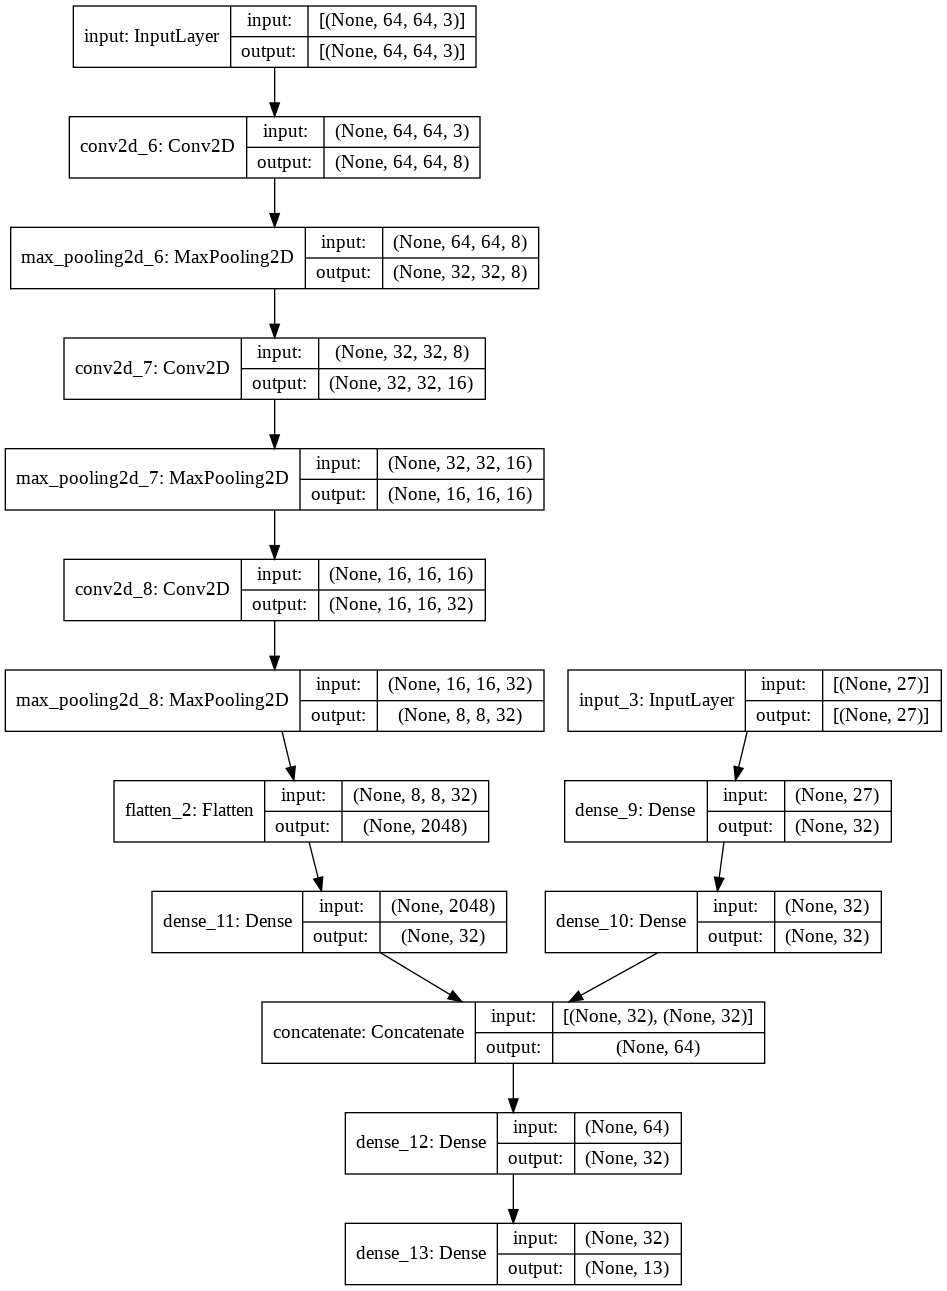

In [ ]:
keras.utils.plot_model(model, "VQA_Model.png", show_shapes=True)

# Training Model

In [ ]:
print(np.array(train_X_imgs).shape, train_X_text.shape, train_Y.shape)
print(np.array(test_X_imgs).shape, test_X_text.shape, test_Y.shape)

(38575, 64, 64, 3) (38575, 27) (38575, 13)
(9673, 64, 64, 3) (9673, 27) (9673, 13)


In [ ]:
# Train the model!
model.fit(
  [train_X_imgs, train_X_text],
  train_Y,
  validation_data=([test_X_imgs, test_X_text], test_Y),
  shuffle=True,
  epochs=10,
)

Epoch 1/10
1206/1206 [==============================] - 6s 5ms/step - loss: 0.5537 - accuracy: 0.7443 - val_loss: 0.5226 - val_accuracy: 0.7582
Epoch 2/10
1206/1206 [==============================] - 6s 5ms/step - loss: 0.4898 - accuracy: 0.7696 - val_loss: 0.4637 - val_accuracy: 0.7738
Epoch 3/10
1206/1206 [==============================] - 6s 5ms/step - loss: 0.4236 - accuracy: 0.7953 - val_loss: 0.4228 - val_accuracy: 0.7944
Epoch 4/10
1206/1206 [==============================] - 6s 5ms/step - loss: 0.3662 - accuracy: 0.8271 - val_loss: 0.3687 - val_accuracy: 0.8277
Epoch 5/10
1206/1206 [==============================] - 6s 5ms/step - loss: 0.3121 - accuracy: 0.8546 - val_loss: 0.2985 - val_accuracy: 0.8577
Epoch 6/10
1206/1206 [==============================] - 6s 5ms/step - loss: 0.2469 - accuracy: 0.8915 - val_loss: 0.2489 - val_accuracy: 0.8856
Epoch 7/10
1206/1206 [==============================] - 6s 5ms/step - loss: 0.1826 - accuracy: 0.9275 - val_loss: 0.1862 - val_accuracy:

# Prediction

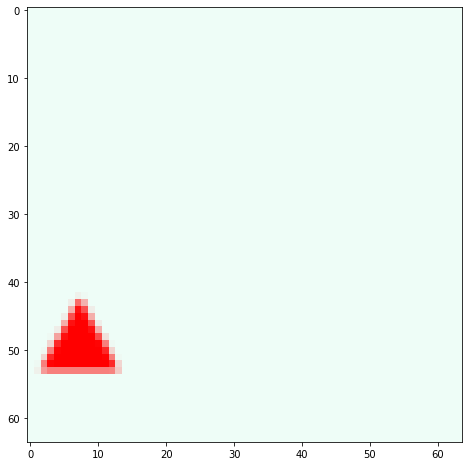

In [ ]:
image_path = get_test_image_paths()[0]
img = mpimg.imread(image_path)
plt.imshow(img)

In [ ]:
x_text = tokenizer.texts_to_matrix([test_questions[0]])
x_text

array([[0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [ ]:
def process_input(image_path, question):
    x_img = np.array([load_and_proccess_image(image_path)])
    x_text = tokenizer.texts_to_matrix([question])

    return [x_img, x_text]

In [ ]:
inf_input = process_input(image_path, "is this a circle?")

In [ ]:
inf_input[0].shape, inf_input[1].shape

((1, 64, 64, 3), (1, 27))

In [ ]:
pred = model.predict(inf_input)

In [ ]:
all_answers[np.argmax(pred)]

'no'